In [1]:
# Step 1: Exploring and pre-processing of the dataset for clustering

In [2]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [3]:
# Load dataset

wh_data = pd.read_csv("Warehouse_data.csv")

In [4]:
# The first 5 rows of the datase

wh_data.head()

,Purchase_Order_No,Product_Name,Customer_ID,Gender,Age,City,Quantity_Ordered,Quantity_Delivered,Quantity_Returned,Quantity_Redelivered
0,10358,PP Bags 50Kg,S18_2319,Male,44,Manchester,472,134,94,389.0
1,10375,PP Bags 50Kg,S10_1678,Male,33,London,392,248,174,286.0
2,10409,PP Bags 50Kg,S18_2325,Female,52,Bradford,185,129,64,121.0
3,10423,PP Bags 50Kg,S18_2949,Female,33,Salford,176,234,117,58.0
4,10425,PP Bags 50Kg,S18_2432,Male,30,Bath,200,373,373,NaN


In [5]:
# The last 5 rows of the dataset

wh_data.tail()

,Purchase_Order_No,Product_Name,Customer_ID,Gender,Age,City,Quantity_Ordered,Quantity_Delivered,Quantity_Returned,Quantity_Redelivered
1065,10292,PP Bags 50Kg,S18_4027,Female,34,Durham,330,340,340,NaN
1066,10292,PP Bags 50Kg,S18_4027,Female,34,Durham,186,137,68,117.0
1067,10127,PP Bags 50Kg,S18_2238,Male,60,Bradford,433,181,127,341.0
1068,10348,PP Bags 50Kg,S18_4668,Male,52,Gloucester,166,180,90,76.0
1069,10348,PP Bags 50Kg,S18_4668,Male,52,Gloucester,184,137,68,116.0


In [6]:
# The number of rows and columns of the dataset

wh_data.shape

(1070, 10)

In [7]:
# The summary of the dataset

wh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Purchase_Order_No     1070 non-null   int64  
 1   Product_Name          1070 non-null   object 
 2   Customer_ID           1070 non-null   object 
 3   Gender                1070 non-null   object 
 4   Age                   1070 non-null   int64  
 5   City                  1070 non-null   object 
 6   Quantity_Ordered      1070 non-null   int64  
 7   Quantity_Delivered    1070 non-null   int64  
 8   Quantity_Returned     1070 non-null   int64  
 9   Quantity_Redelivered  719 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 83.7+ KB


In [8]:
# The description of the dataset

wh_data.describe()

,Purchase_Order_No,Age,Quantity_Ordered,Quantity_Delivered,Quantity_Returned,Quantity_Redelivered
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,719.000000
mean,10263.830841,40.425234,304.979439,232.297196,187.434579,227.776078
std,92.965721,10.387331,111.415972,99.415671,127.585672,128.393138
min,10101.000000,21.000000,107.000000,70.000000,35.000000,12.000000
25%,10183.000000,33.000000,207.000000,152.000000,87.000000,103.000000
50%,10270.500000,41.000000,287.000000,196.000000,119.000000,257.000000
75%,10339.000000,48.000000,421.000000,340.000000,340.000000,354.500000
max,10425.000000,67.000000,512.000000,444.000000,444.000000,425.000000


In [9]:
# Filling the missig values of the dataset, as missing values are in numercial cloumn we will 'mean' to fill it

wh_data = wh_data.fillna(wh_data.Quantity_Redelivered.mean())
wh_data.head()

,Purchase_Order_No,Product_Name,Customer_ID,Gender,Age,City,Quantity_Ordered,Quantity_Delivered,Quantity_Returned,Quantity_Redelivered
0,10358,PP Bags 50Kg,S18_2319,Male,44,Manchester,472,134,94,389.000000
1,10375,PP Bags 50Kg,S10_1678,Male,33,London,392,248,174,286.000000
2,10409,PP Bags 50Kg,S18_2325,Female,52,Bradford,185,129,64,121.000000
3,10423,PP Bags 50Kg,S18_2949,Female,33,Salford,176,234,117,58.000000
4,10425,PP Bags 50Kg,S18_2432,Male,30,Bath,200,373,373,227.776078


In [10]:
# Checking the data again for missing values

wh_data.isnull().sum()

Purchase_Order_No       0
Product_Name            0
Customer_ID             0
Gender                  0
Age                     0
City                    0
Quantity_Ordered        0
Quantity_Delivered      0
Quantity_Returned       0
Quantity_Redelivered    0
dtype: int64

In [11]:
# Convert 'Quantity_Redelivered' column into integer

wh_data.Quantity_Redelivered = wh_data.Quantity_Redelivered.astype(int)
wh_data.head()

,Purchase_Order_No,Product_Name,Customer_ID,Gender,Age,City,Quantity_Ordered,Quantity_Delivered,Quantity_Returned,Quantity_Redelivered
0,10358,PP Bags 50Kg,S18_2319,Male,44,Manchester,472,134,94,389
1,10375,PP Bags 50Kg,S10_1678,Male,33,London,392,248,174,286
2,10409,PP Bags 50Kg,S18_2325,Female,52,Bradford,185,129,64,121
3,10423,PP Bags 50Kg,S18_2949,Female,33,Salford,176,234,117,58
4,10425,PP Bags 50Kg,S18_2432,Male,30,Bath,200,373,373,227


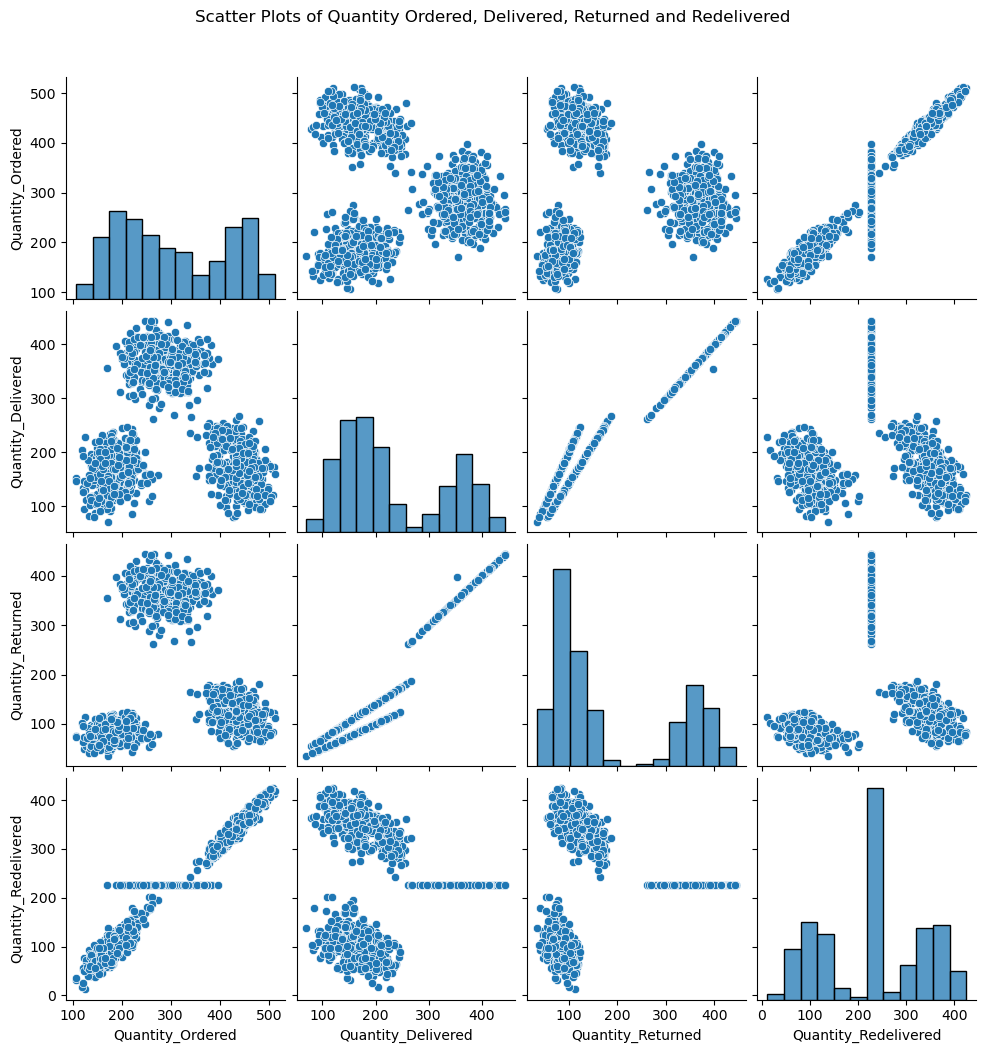

In [12]:
sns.pairplot(wh_data, vars=['Quantity_Ordered', 'Quantity_Delivered', 'Quantity_Returned', 'Quantity_Redelivered'])
plt.suptitle('Scatter Plots of Quantity Ordered, Delivered, Returned and Redelivered', y=1.05)
plt.show()

In [13]:
# Input Varibales: we will use 'Quantity Ordered', 'Quantity Delivered' Quantity Returned' and 'Quantity Redelivered as input

X = wh_data.iloc[:,[6,7,8,9]].values
X[0:3]

array([[472, 134,  94, 389],
       [392, 248, 174, 286],
       [185, 129,  64, 121]], dtype=int64)

In [14]:
# Data Normalization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_SC = scaler.fit_transform(X)
X_SC[0:3]

array([[ 1.49977297, -0.98921187, -0.7326706 ,  1.53532374],
       [ 0.7814073 ,  0.15802485, -0.10534774,  0.55600859],
       [-1.07736388, -1.03952927, -0.96791667, -1.01279722]])

In [15]:
# Step 2: Application of Kmeans Algoritham

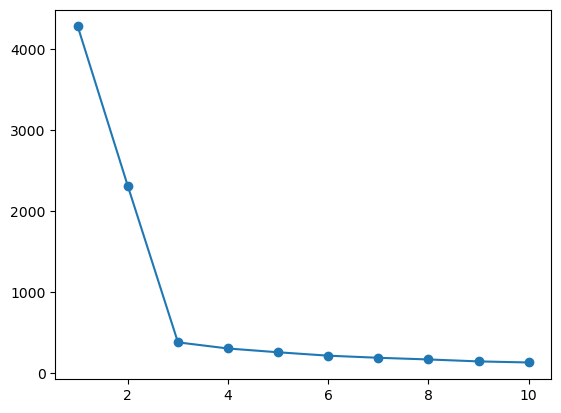

In [16]:
# (a) Computation of number of clusters by using elbow method

from sklearn.cluster import KMeans

k_rng = range(1,11)
SSE = []
for k in k_rng:
    km = KMeans(n_clusters = k, init = 'k-means++', n_init=10, random_state = 42 )
    km.fit(X_SC)
    SSE.append(km.inertia_)
plt.plot(k_rng, SSE, marker = 'o')

In [17]:
# (b) Application of Kmeans Algoritham to the scaled data and prediction of label for the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init=10, random_state = 42)
y_pred_km = kmeans.fit_predict(X_SC)
y_pred_km[0:3]

array([0, 0, 2])

In [18]:
# Final locations of the centroids
kmeans.cluster_centers_

array([[ 1.22284897, -0.62277296, -0.5343297 ,  1.17462877],
       [-0.16858526,  1.32816961,  1.38767175, -0.00495833],
       [-1.06780741, -0.67420808, -0.82173117, -1.17961065]])

In [19]:
# View of the dataset with labels after Kmeans application

wh_data['Order_Status'] = y_pred_km
wh_data.head()

,Purchase_Order_No,Product_Name,Customer_ID,Gender,Age,City,Quantity_Ordered,Quantity_Delivered,Quantity_Returned,Quantity_Redelivered,Order_Status
0,10358,PP Bags 50Kg,S18_2319,Male,44,Manchester,472,134,94,389,0
1,10375,PP Bags 50Kg,S10_1678,Male,33,London,392,248,174,286,0
2,10409,PP Bags 50Kg,S18_2325,Female,52,Bradford,185,129,64,121,2
3,10423,PP Bags 50Kg,S18_2949,Female,33,Salford,176,234,117,58,2
4,10425,PP Bags 50Kg,S18_2432,Male,30,Bath,200,373,373,227,1


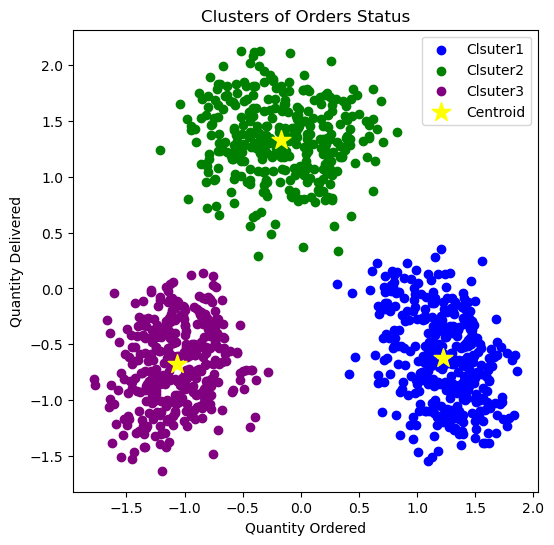

In [20]:
# Scatter plot of 'Quantity Ordered' and 'Quantity Delivered' to view clusters with centroids

plt.figure(figsize=(6,6))

plt.scatter(X_SC[y_pred_km == 0, 0], X_SC[y_pred_km == 0, 1], c = 'blue', label = 'Clsuter1')
plt.scatter(X_SC[y_pred_km == 1, 0], X_SC[y_pred_km == 1, 1], c = 'green', label = 'Clsuter2')
plt.scatter(X_SC[y_pred_km == 2, 0], X_SC[y_pred_km == 2, 1], c = 'purple', label = 'Clsuter3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, color = 'yellow', marker = '*', label = 'Centroid')

plt.title('Clusters of Orders Status')
plt.xlabel('Quantity Ordered')
plt.ylabel('Quantity Delivered')
plt.legend()
plt.show()

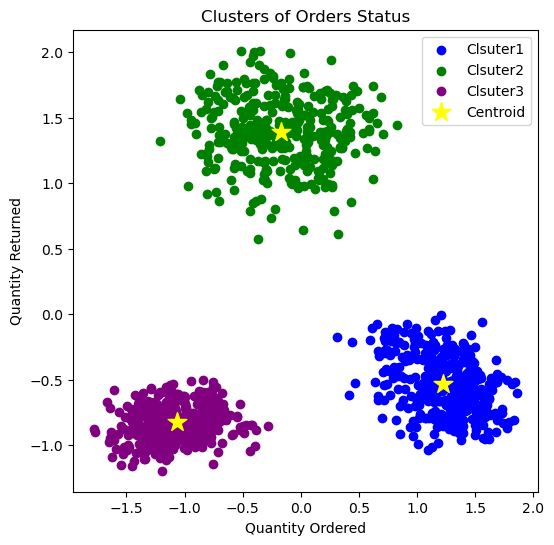

In [21]:
# Scatter plot of 'Quantity Ordered' and 'Quantity Returned' to view clusters with centroids

plt.figure(figsize=(6,6))

plt.scatter(X_SC[y_pred_km == 0, 0], X_SC[y_pred_km == 0, 2], c = 'blue', label = 'Clsuter1')
plt.scatter(X_SC[y_pred_km == 1, 0], X_SC[y_pred_km == 1, 2], c = 'green', label = 'Clsuter2')
plt.scatter(X_SC[y_pred_km == 2, 0], X_SC[y_pred_km == 2, 2], c = 'purple', label = 'Clsuter3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], s = 200, color = 'yellow', marker = '*', label = 'Centroid')

plt.title('Clusters of Orders Status')
plt.xlabel('Quantity Ordered')
plt.ylabel('Quantity Returned')
plt.legend()
plt.show()

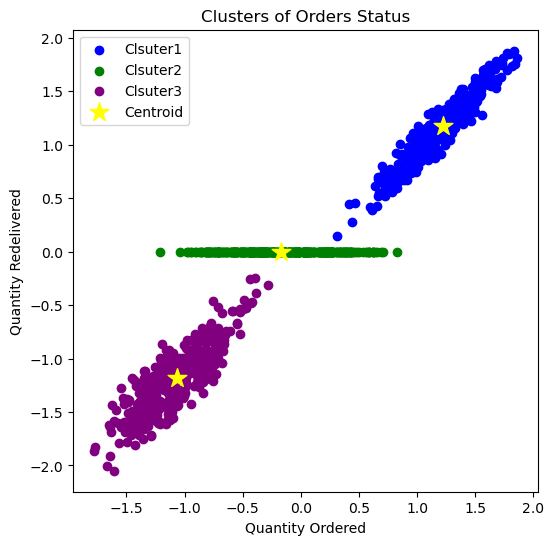

In [22]:
# Scatter plot of 'Quantity Ordered' and 'Quantity Redelivered' to view clusters with centroids

plt.figure(figsize=(6,6))
           
plt.scatter(X_SC[y_pred_km == 0, 0], X_SC[y_pred_km == 0, 3], c = 'blue', label = 'Clsuter1')
plt.scatter(X_SC[y_pred_km == 1, 0], X_SC[y_pred_km == 1, 3], c = 'green', label = 'Clsuter2')
plt.scatter(X_SC[y_pred_km == 2, 0], X_SC[y_pred_km == 2, 3], c = 'purple', label = 'Clsuter3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,3], s = 200, color = 'yellow', marker = '*', label = 'Centroid')

plt.title('Clusters of Orders Status')
plt.xlabel('Quantity Ordered')
plt.ylabel('Quantity Redelivered')
plt.legend()
plt.show()